# Practical 1
## Single Layer Perceptron
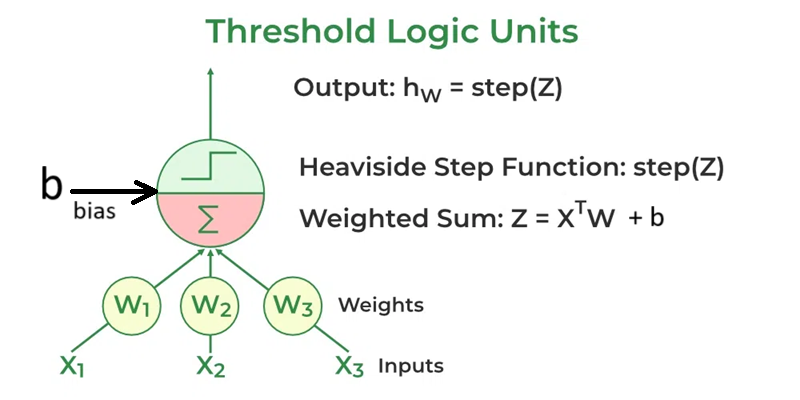
### A single-layer perceptron (SLP) is the simplest form of an artificial neural network. It is a feed-forward network primarily used for binary classification tasks, meaning it can classify data into one of two categories. 
#### **Key characteristics and working principles:**
#####  **Structure:**
##### An SLP consists of a single layer of processing units (neurons), often referred to as a "threshold transfer function" or "Threshold Logic Units (TLU)". It directly connects input nodes to output nodes.
##### **Weighted Sum:**
##### Each input feature is multiplied by a corresponding weight, and these weighted inputs are then summed together. A bias term is also typically added to this sum.
##### **Activation Function:**
##### The weighted sum is then passed through an activation function, usually a step function or a sign function, which produces a binary output (e.g., 0 or 1, or -1 or 1) based on whether the sum exceeds a certain threshold.
##### **Learning:**
##### SLPs learn by adjusting their weights and bias based on the difference between the predicted output and the desired output. If the prediction is incorrect, the weights are updated to reduce the error in subsequent predictions. This process is repeated iteratively until the error falls below a specified threshold or a maximum number of iterations is reached.
##### **Linear Separability:**
##### A fundamental limitation of SLPs is their ability to only classify linearly separable data. This means they can only distinguish between classes that can be separated by a straight line (or a hyperplane in higher dimensions). Problems like the XOR problem, which are not linearly separable, cannot be solved by a single-layer perceptron.
##### **Bias:**
##### The bias term helps the perceptron make adjustments independent of the input, improving its flexibility in learning.
##### *In essence, the single-layer perceptron acts as a linear classifier, drawing a decision boundary to separate data points into different categories.*

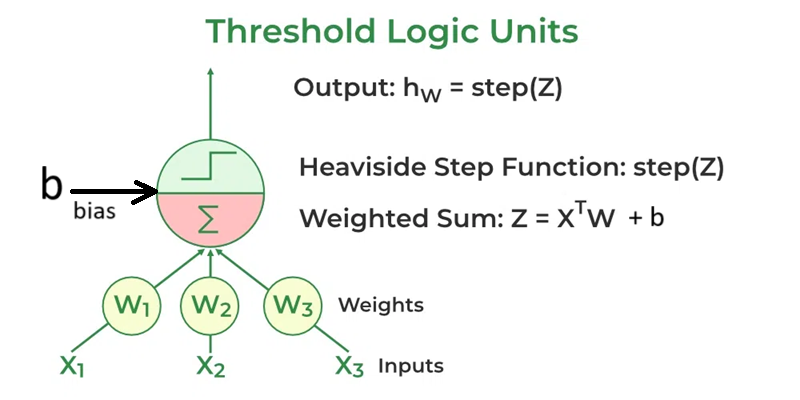

### Necessary Imports

In [81]:
import numpy as np
import matplotlib.pyplot as plt

### Iniating necessary variables for training Single-Layer Perceptron for AND Gate

In [ ]:
x=np.array([[0,0],[0,1],[1,0],[1,1]])
X=x
y=np.array([0,0,0,1])
Y=y
lr=0.001 # learning rate which must not be too high nor be too low 
epoches=1000

### Defining Step Function
#### The step function compares this weighted sum to a threshold. If the input is larger than the threshold value, the output is 1; otherwise, it's 0.

In [83]:
def stepfn(x):
    return np.where(x >= 0, 1, 0)

### Logic for training the Perceptron
#### During training, the Perceptron's weights are adjusted to minimize the difference between the predicted output and the actual output. This is achieved using supervised learning algorithms like the delta rule or the Perceptron learning rule.

The weight & bias update formula is:

>error = target_value - Predicted_value

>weight<sub>new</sub> = weight<sub>old</sub> + learning_rate * error * input

>bias<sub>new</sub> = bias<sub>old</sub> + learning_rate * error

This process enables the perceptron to learn from data and improve its prediction accuracy over time.
How to use it:

In [84]:
def perceptron(X, Y, lr, epoches):
    rs,cf=x.shape
    history=[]
    w=np.random.randn(cf)
    b=np.random.randn()
    
    for i in range(epoches+1):
        total_error=0
        for input,target in zip (X,Y):
            v=np.dot(input,w)+b # np.dot(input,w) because input and weight are matrices respectively of form input(4,2) and weight(2,1)
            # v=input@w+b
            pred=stepfn(v)
            error=pred-target
            update=lr*error
            b+=update
            w+=update*input
            total_error+=abs(error)
            history.append({'epoch':i,'target':target,'pred':pred,'err':error,"bias":b,'weight':w.copy(),'update':update,'total_error':total_error})
    return b,w,history



### Logic for predicting the output for AND Gate

In [85]:
def prediction(x, w, b):
    v=np.dot(w,x)+b
    return stepfn(v)

### Training the Perceptron

In [86]:
b,w,history=perceptron(x, y, lr, epoches)

### Getting final bias and weight values

In [87]:
print("Bias:", b)
print("Weights:", w)

Bias: -1.1628132927491488
Weights: [0.47061592 0.74359576]


### Making Prediction

In [88]:
x=np.array([0,0])
prediction(x, w, b)

array(0)

In [89]:
x=np.array([0,1])
prediction(x, w, b)

array(0)

In [90]:
x=np.array([1,0])
prediction(x, w, b)

array(0)

In [91]:
x=np.array([1,1])
prediction(x, w, b)

array(1)

### History of the training

In [ ]:
history

In [ ]:
[{'epoch': 0,
  'target': np.int64(0),
  'pred': array(0),
  'err': np.int64(0),
  'bias': np.float64(-1.1628132927491488),
  'weight': array([0.47061592, 0.74359576]),
  'update': np.float64(0.0),
  'total_error': np.int64(0)},
 {'epoch': 0,
  'target': np.int64(0),
  'pred': array(0),
  'err': np.int64(0),
  'bias': np.float64(-1.1628132927491488),
  'weight': array([0.47061592, 0.74359576]),
  'update': np.float64(0.0),
  'total_error': np.int64(0)}, 
 ...]

### Plotting evolution graphs

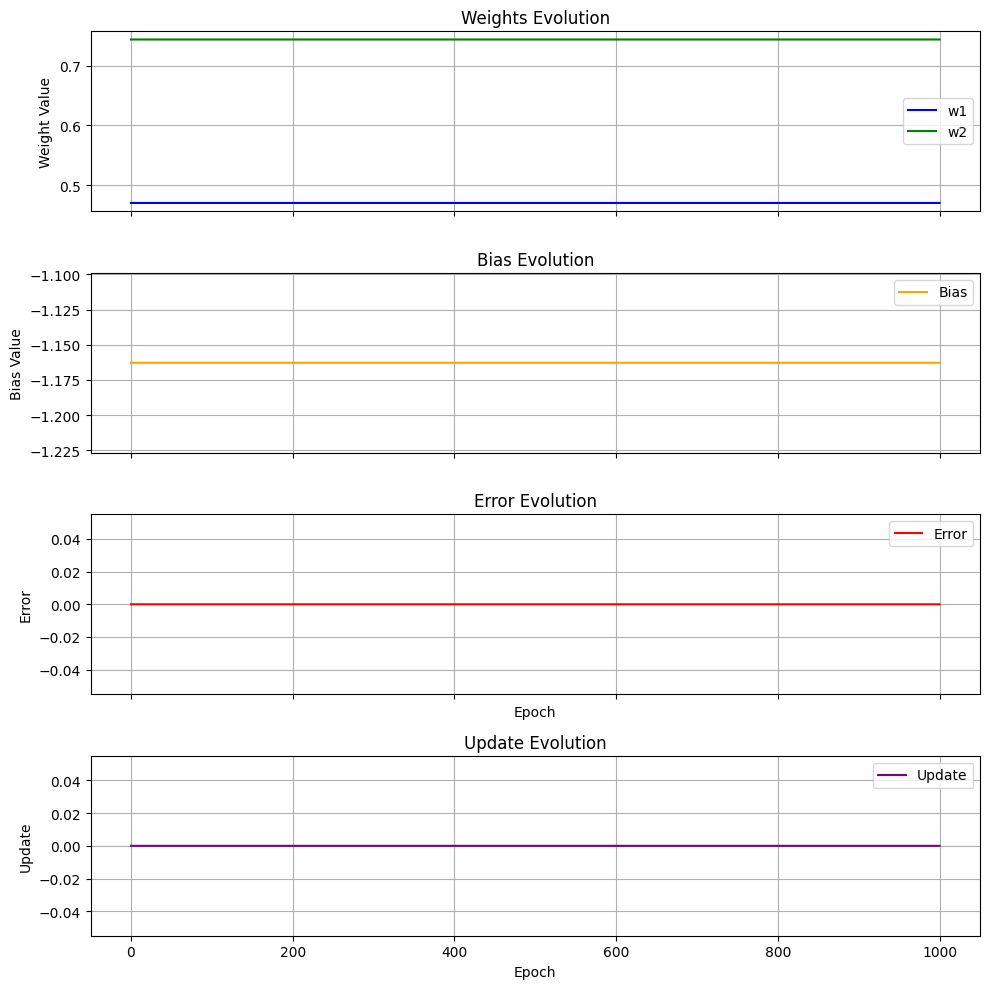

In [ ]:
epochs_list = np.array([h['epoch'] for h in history])
weights = np.array([h['weight'] for h in history])
biases = np.array([h['bias'] for h in history])
errors = np.array([h['err'] for h in history])
updates = np.array([h['update'] for h in history])

fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

# Weights evolution
axs[0].plot(epochs_list, weights[:, 0], label='w1', color='blue')
axs[0].plot(epochs_list, weights[:, 1], label='w2', color='green')
axs[0].set_ylabel('Weight Value')
axs[0].set_title('Weights Evolution')
axs[0].legend()
axs[0].grid(True)

# Bias evolution
axs[1].plot(epochs_list, biases, label='Bias', color='orange')
axs[1].set_ylabel('Bias Value')
axs[1].set_title('Bias Evolution')
axs[1].legend()
axs[1].grid(True)

# Error evolution
axs[2].plot(epochs_list, errors, label='Error', color='red')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Error')
axs[2].set_title('Error Evolution')
axs[2].legend()
axs[2].grid(True)

# Update evolution
axs[3].plot(epochs_list, updates, label='Update', color='purple')
axs[3].set_xlabel('Epoch')
axs[3].set_ylabel('Update')
axs[3].set_title('Update Evolution')
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()

### Plotting decision boundry of the hyperplane(single-layer)

In [94]:
def plot_decision_boundary(X, Y, w, b):
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),np.linspace(y_min, y_max, 300))

    # Predict grid points
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([stepfn(np.dot(p, w) + b) for p in grid])
    Z = Z.reshape(xx.shape)

    # Colored background
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    # Decision line
    x_values = np.linspace(x_min, x_max, 100)
    y_values = -(w[0] * x_values + b) / w[1]
    plt.plot(x_values, y_values, color='black', linewidth=2, label='Decision Boundary')

    # Original points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='black', cmap='coolwarm', s=100)
    for i, point in enumerate(X):
        plt.text(point[0]+0.05, point[1]+0.05, str(Y[i]), fontsize=12)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary for AND Gate')
    plt.legend()
    plt.show()

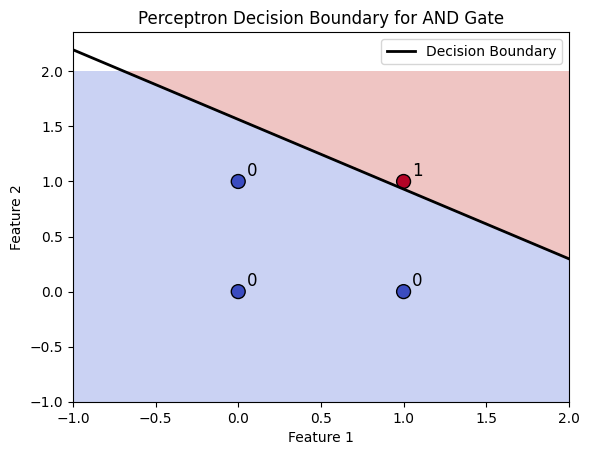

In [95]:
plot_decision_boundary(X, Y, w, b)

In [96]:
def plot_decision_boundary_from_history(X, Y, history, epoch):
    # Extract data from history
    weights = np.array([h['weight'] for h in history])
    biases = np.array([h['bias'] for h in history])
    epochs_list = np.array([h['epoch'] for h in history])

    # Get the last index of the requested epoch
    idxs = np.where(epochs_list == epoch)[0]
    if len(idxs) == 0:
        raise ValueError(f"Epoch {epoch} not found in history")
    idx = idxs[-1]  # last update in that epoch
    w = weights[idx]
    b = biases[idx]

    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

    # Predictions on grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([stepfn(np.dot(p, w) + b) for p in grid])
    Z = Z.reshape(xx.shape)

    # Plot background
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    # Decision line
    if w[1] != 0:  # Avoid division by zero
        x_values = np.linspace(x_min, x_max, 100)
        y_values = -(w[0] * x_values + b) / w[1]
        plt.plot(x_values, y_values, color='black', linewidth=2, label=f'Boundary @ Epoch {epoch}')

    # Data points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='black', cmap='coolwarm', s=100)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Perceptron Decision Boundary at Epoch {epoch}')
    plt.legend()
    plt.show()


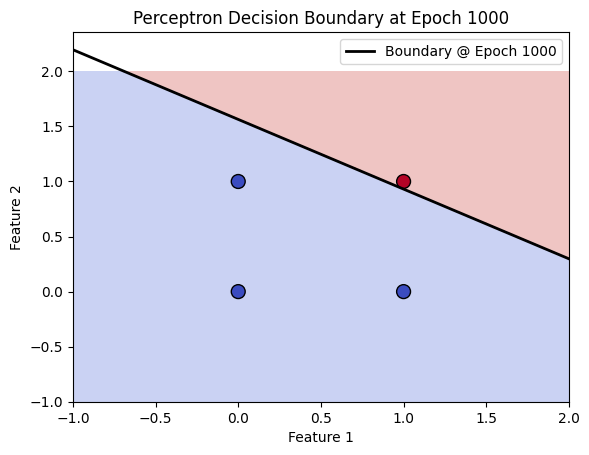

In [97]:

plot_decision_boundary_from_history(X, Y, history,epoch=epoches)

### Testing code with values outside training values

In [98]:
x=np.array([0.9,0.4])
prediction(x, w, b)

array(0)